In [1]:
import numpy as numpy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2, random_state=42)

In [6]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [7]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values



C:\Users\parth\AppData\Local\Temp\ipykernel_12500\1025480568.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
C

In [9]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values



array([25.  ,  1.  , 42.  , 23.  , 27.  , 23.  , 30.  , 32.  , 36.  ,
       55.  , 11.  , 43.  , 47.  , 28.  , 18.  , 39.  , 16.  , 25.  ,
        4.  , 25.  , 30.  , 15.  , 16.  , 28.  , 51.  , 55.  , 28.  ,
       47.  ,  0.42, 41.  , 65.  , 49.  , 48.  , 50.  , 48.  , 30.  ,
       20.  ,  7.  , 17.  , 19.  , 29.  , 32.  , 26.  , 45.  , 33.  ,
       28.  , 18.  , 31.  , 28.  ,  4.  ,  3.  , 44.  , 16.  , 38.  ,
       26.  , 31.  , 40.  , 43.  , 24.5 , 58.  , 19.  , 25.  , 25.  ,
       37.  , 27.  , 32.  , 17.  , 24.  , 21.  , 21.  , 44.  , 32.  ,
       32.  , 19.  , 34.  ,  5.  , 18.  , 19.  , 22.  , 48.  , 28.  ,
       18.  , 32.  , 18.  , 61.  , 27.  , 45.  , 33.  , 49.  , 62.  ,
       29.  , 24.  , 40.  , 43.  , 23.  , 23.  , 24.  , 36.  , 30.  ,
       27.  , 45.5 , 30.  , 39.  , 31.  , 35.  , 28.  , 36.  , 24.  ,
       23.  , 58.  , 29.  , 19.  , 27.  ,  8.  , 54.  , 26.  , 32.5 ,
       35.  , 17.  , 40.  , 41.  , 25.  , 32.  , 64.  , 45.  , 19.  ,
        4.  , 40.  ,

In [10]:
x_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,35.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


C:\Users\parth\AppData\Local\Temp\ipykernel_12500\3925229177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\parth\AppData\Local\Temp\ipykernel_12500\3925229177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[

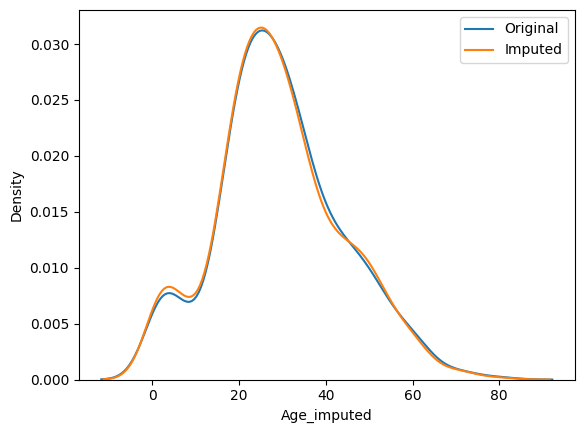

In [11]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [12]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())


Original variable variance:  210.2517072477435
Variance after random imputation:  211.34212820683004


In [14]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,57.703009
Age,71.580633,210.251707,210.251707
Age_imputed,57.703009,210.251707,211.342128


### The covariance is changes a lot

<Axes: >

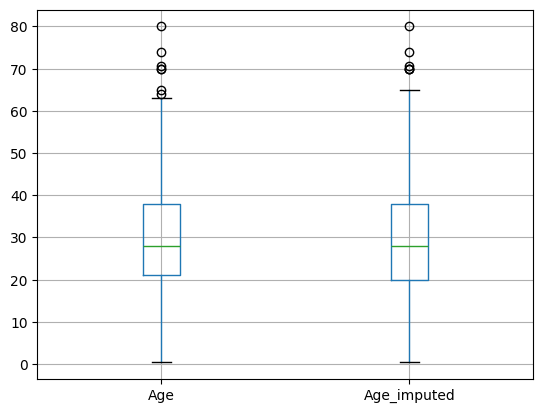

In [15]:
x_train[['Age', 'Age_imputed']].boxplot()


### this not affect the outliers

In [18]:
# sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


### This usually do in productio, to not toget the same to values with same input

## on catagorical data

In [20]:
data = pd.read_csv("house price advance regression.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])


In [21]:
data.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [22]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### nearly 50% data is missing

In [23]:
X = data
y = data['SalePrice']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)



In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']


In [26]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
737,Gd,TA,239900,TA,Gd
607,NaN,TA,225000,TA,NaN
177,Gd,TA,172500,TA,Gd
266,TA,TA,185000,TA,TA
1277,Gd,TA,197900,TA,Gd


In [27]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\parth\AppData\Local\Temp\ipykernel_12500\613679808.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual

In [28]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']



In [29]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035103
Gd,0.009973,0.010274
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [30]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp


,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.540965
Fa,0.040917,0.050505
Po,0.027823,0.037037
Ex,0.024550,0.033670


C:\Users\parth\AppData\Local\Temp\ipykernel_12500\416271417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\parth\AppData\Local\Temp\ipykernel_12500\416271417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

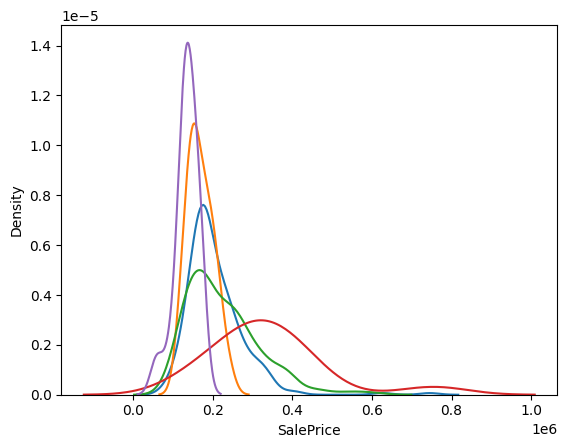

In [31]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()


### While filling random catagorical value,

### due to large amt of data is missing the random data-fill not gives the appropriate output in seelcted col.
